<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0178/blob/main/03.E0-Exercicio-Agrupamento-de-Dados.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0178 - Mineração de Dados
# Agrupamento de dados

**Professor:** Paulo de Tarso Guerra Oliveira ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))


# Lista de Exercícios: Agrupamento de dados

Nesta lista de exercícios, você explorará a aplicação de métodos de aprendizado de máquina para realizar tarefas de agrupamento de dados (*clustering*). Você usará a base de dados [Iris plants dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) e avaliará algoritmos de agrupamento para comparar sua efetividade. O objetivo é entender como diferentes métodos de aprendizado de máquina se comportam em relação à tarefa de agrupamento de dados.

Você deverá utilizar os algoritmos [K-Means](https://scikit-learn.org/stable/modules/clustering.html#k-means), [Gaussian Mixture](https://scikit-learn.org/stable/modules/mixture.html#mixture) e [DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan) e comparar o resultado produzido por cada modelo para o seguinte conjunto de hiperparâmtros, quando aplicável aquele modelo.

* K-means: 
    * Centróides (`n_clusters`): 2, 3, e 6.    
* Gaussian Mixture
    * Componentes (`n_components`): 2, 3, e 6
    * Covariância (`covariance_type`): `'full'`, `'diag'` e `'spherical'`
* DBSCAN:
    * Distância (`eps`): 0.5, 1 e 1.5.
    * Mínimo de amostras (`min_samples`): 5, 10 e 25.


Como parte do objetivo praticar visualizações de dados, para cada experimento, você deve replicar a seguinte visualização usando apenas o [matplotlib](https://matplotlib.org/stable/users/index).

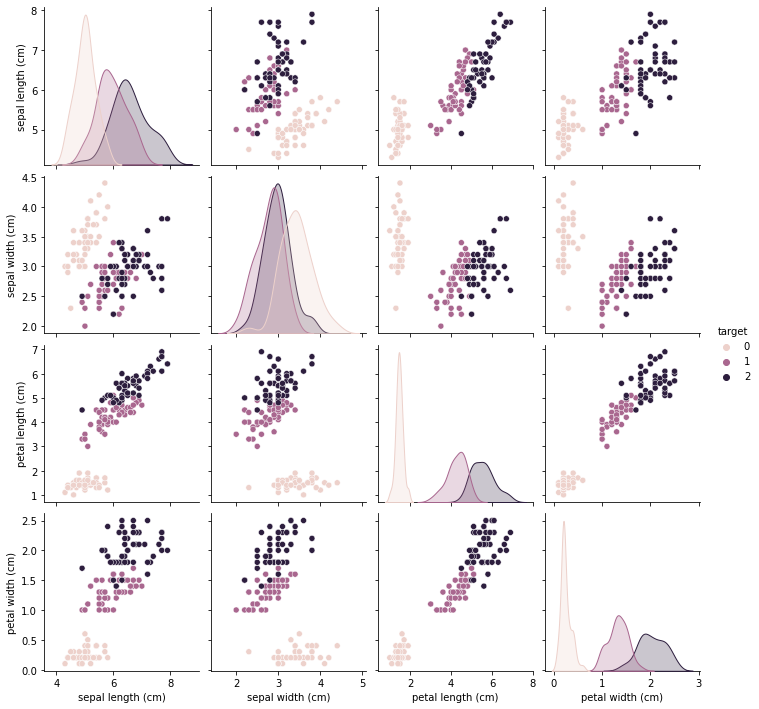

Você deve executar o experimento para cada par *features*, colorindo de acordo com o resultado fornecido pelo modelo de clusterização. Nos elementos da diagonal, você deve executar o cálculo de densidade dos elementos do conjunto usando `KDE` (`bandwidth=1.0, kernel='gaussian'`), também de acordo com a saída do modelo. Compare os experimentos entre si e com o que deveria ser a saída correta dos dados, segundo os rótulos originais do *dataset*. 

Documente todas as etapas em um arquivo Jupyter Notebook (`.ipynb`) que inclua as análises, o código e as justificativas. Lembre-se de que é fundamental justificar todas as decisões tomadas ao longo do processo e documentar as análises de forma clara e concisa. Este trabalho tem como objetivo proporcionar uma compreensão prática da seleção e avaliação de algoritmos de agrupamento em cenários de aprendizado não-supervisionado.

Envie seu Jupyter Notebook até a data de entrega especificada nesta tarefa.

## Solução


### Carga do conjunto de dados

In [20]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
X = scaler.fit_transform(df.drop(columns=["target"]))
y = df["target"]

In [22]:
def plot_clusters(X, y_pred, title, ax):
    """Função auxiliar para plotar os clusters."""
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap="viridis")
    ax.set_title(title)
    ax.set_xlabel("Comprimento da sépala (cm)")
    ax.set_ylabel("Largura da sépala (cm)")

### K-means

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

kmeans_results = {}
for n_clusters in [2, 3, 6]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    kmeans_results[n_clusters] = kmeans.labels_

for n_clusters, labels in kmeans_results.items():
    print(f"Num clusters: {n_clusters}: {f1_score(y, labels, average='macro')}")

Num clusters: 2: 0.0
Num clusters: 3: 0.0
Num clusters: 6: 0.0


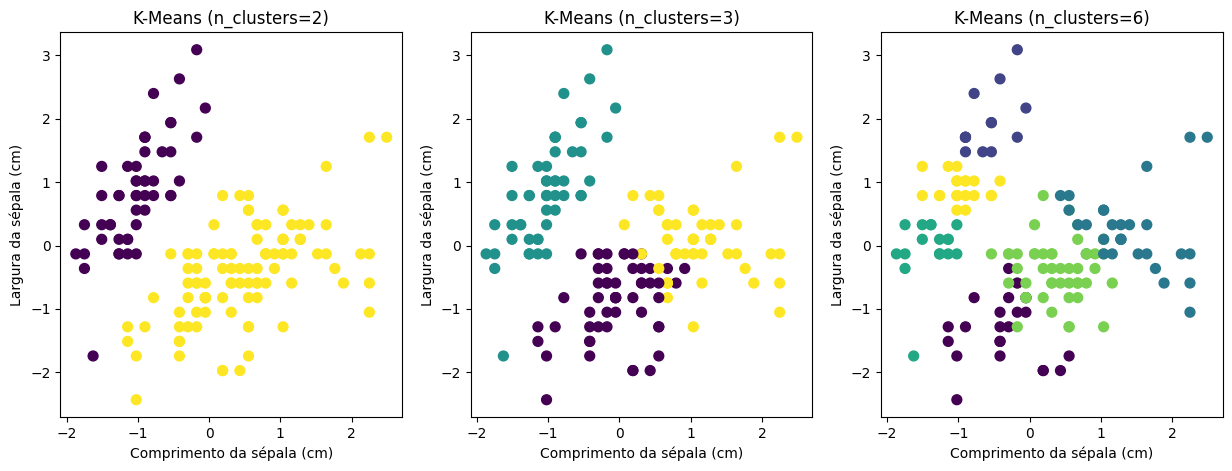

In [24]:
n_clusters_values = [2, 3, 6]
fig, axes = plt.subplots(1, len(n_clusters_values), figsize=(15, 5))

for i, n_clusters in enumerate(n_clusters_values):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    plot_clusters(
        X, kmeans.fit_predict(X), f"K-Means (n_clusters={n_clusters})", axes[i]
    )
plt.show()

### Gaussian

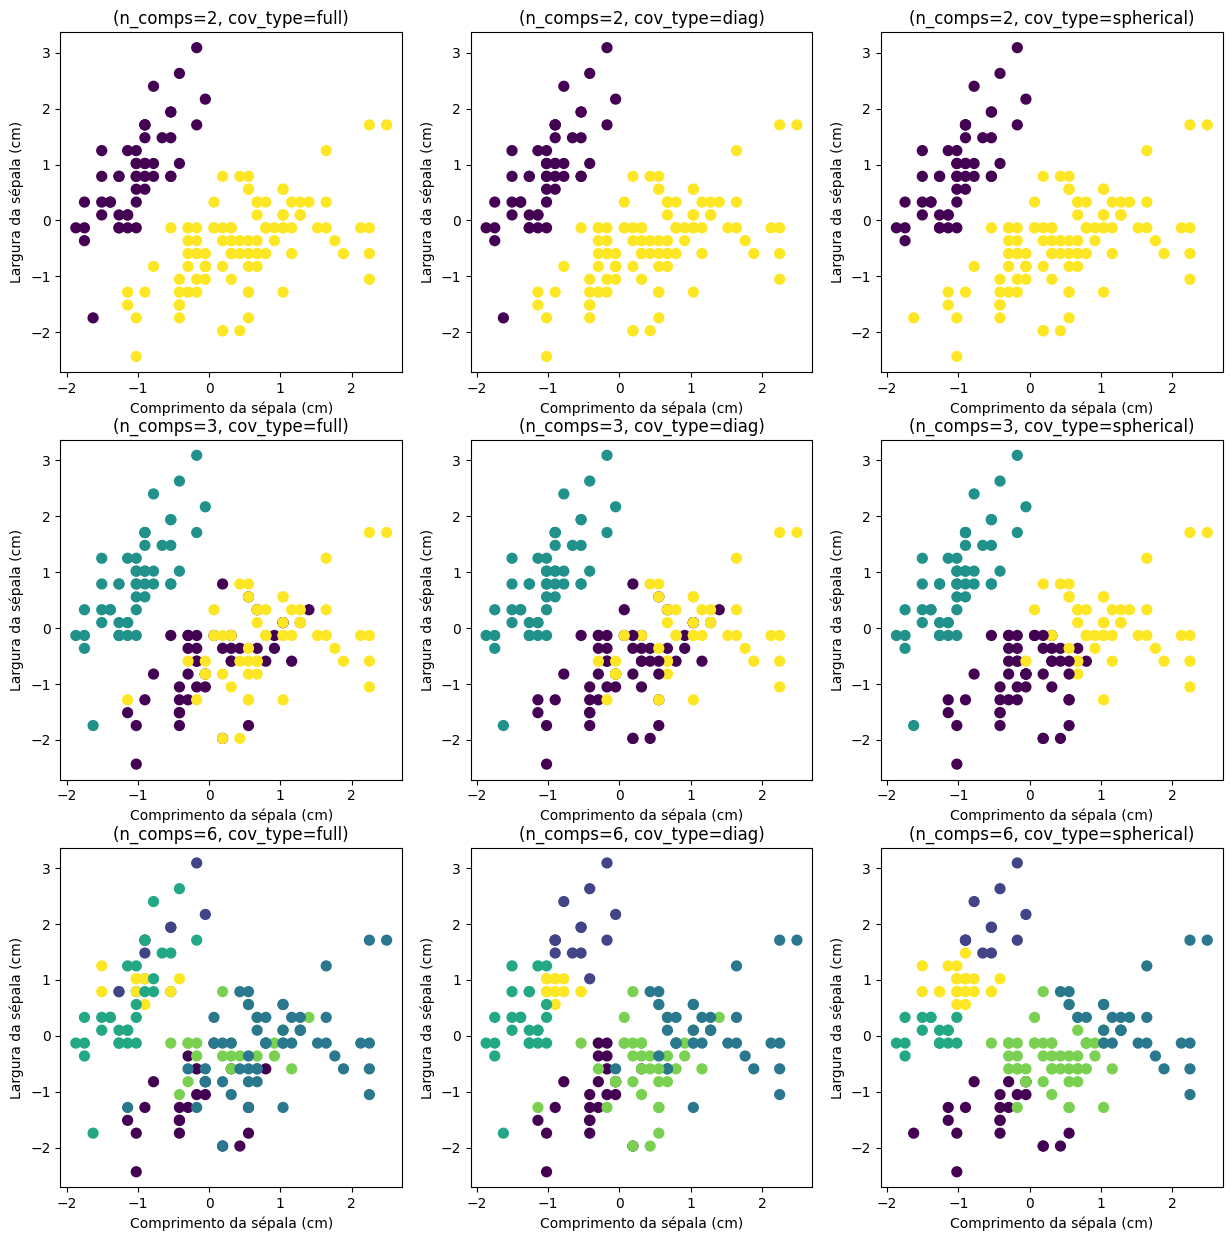

In [25]:
from sklearn.mixture import GaussianMixture

n_components_values = [2, 3, 6]
covariance_types = ["full", "diag", "spherical"]
fig, axes = plt.subplots(
    len(n_components_values), len(covariance_types), figsize=(15, 15)
)
for i, n_components in enumerate(n_components_values):
    for j, covariance_type in enumerate(covariance_types):
        gmm = GaussianMixture(
            n_components=n_components, covariance_type=covariance_type, random_state=0
        )
        plot_clusters(
            X,
            gmm.fit_predict(X),
            f"(n_comps={n_components}, cov_type={covariance_type})",
            axes[i, j],
        )
plt.show()

### DBSCAN

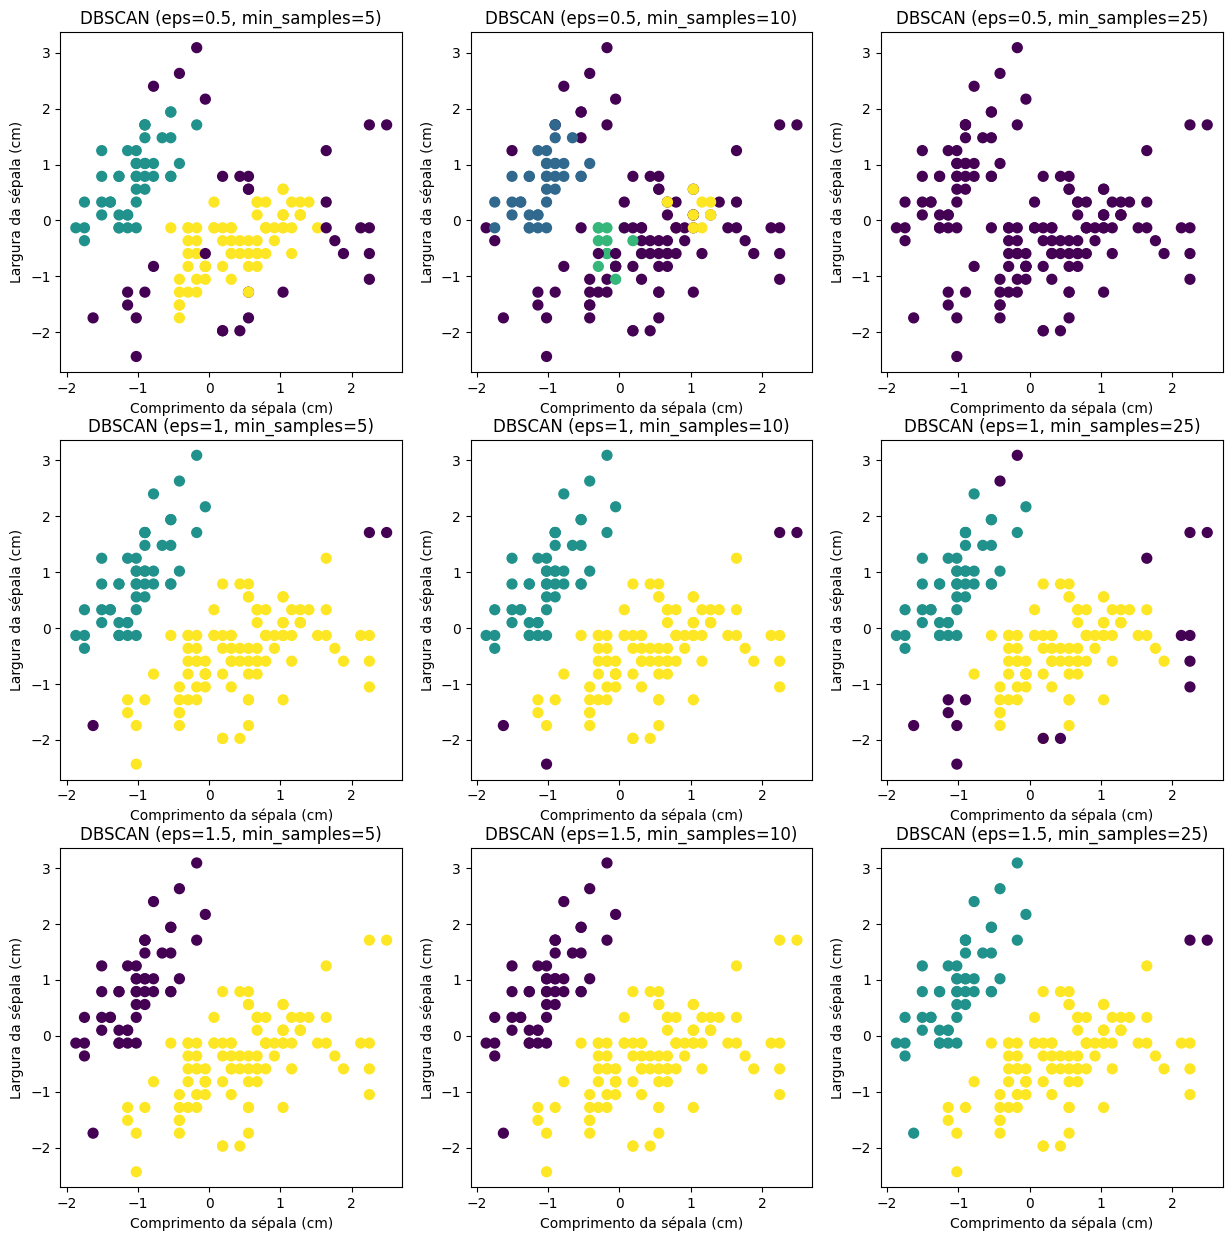

In [26]:
from sklearn.cluster import DBSCAN

eps_values = [0.5, 1, 1.5]
min_samples_values = [5, 10, 25]
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 15))
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        plot_clusters(
            X,
            dbscan.fit_predict(X),
            f"DBSCAN (eps={eps}, min_samples={min_samples})",
            axes[i, j],
        )
plt.show()

### Análise dos resultados

*Insira aqui sua análise e conclusões.*